In [7]:
import numpy as np
import imageio as iio
import matplotlib.pyplot as plt
import cv2

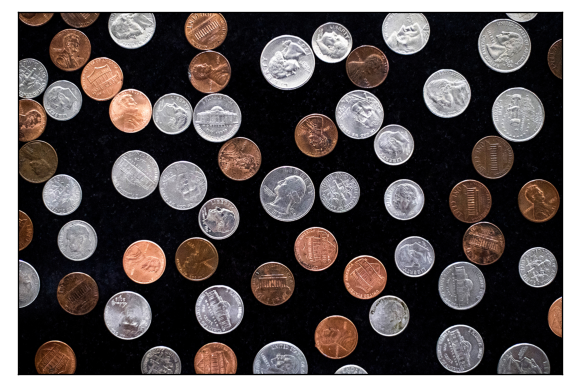

In [8]:
def show_image(img, title='', save=False, name='', ticks=True):
    '''
    a function for showing images
    '''
    plt.figure(dpi=120)
    plt.imshow(img, cmap='gray')
    if ticks:
        plt.xticks([])
        plt.yticks([])
    plt.title(title)
    if save:
        iio.imwrite(name, img)
    plt.show()
    
img = iio.imread('im03.jpg')

show_image(img)

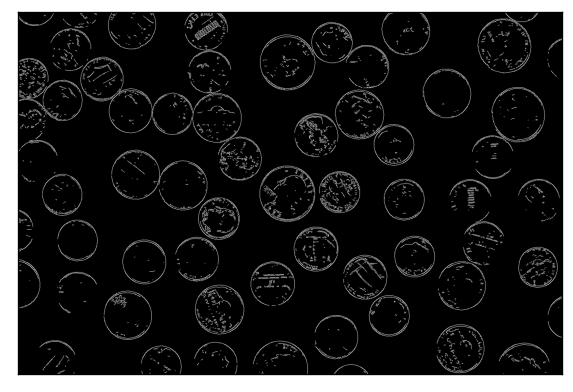

In [9]:
edge = cv2.Canny(img, 500, 700)
show_image(edge, save=True, name='res11.jpg')

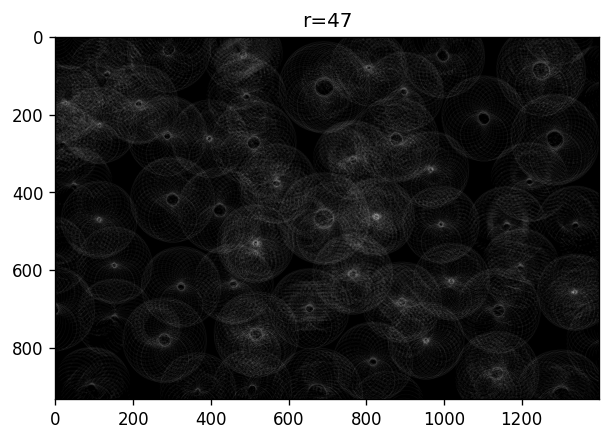

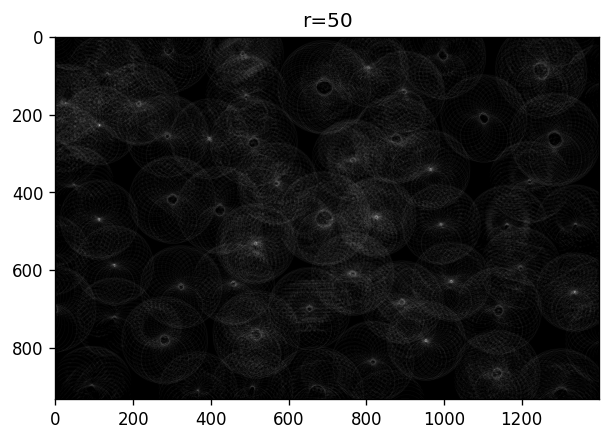

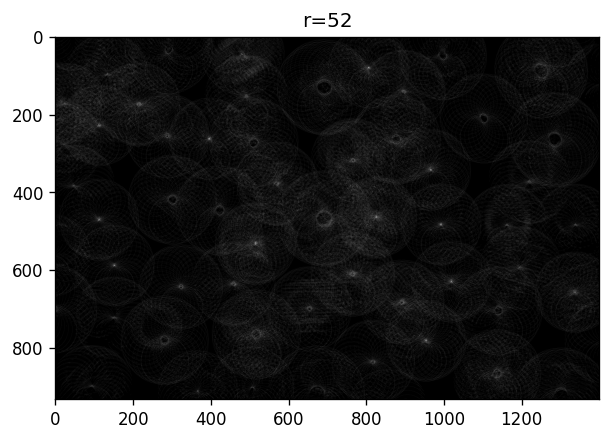

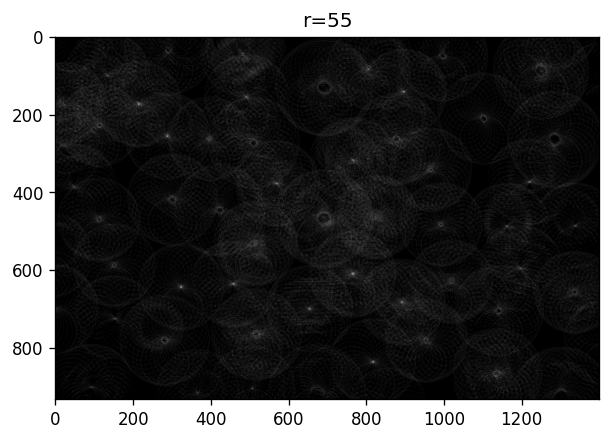

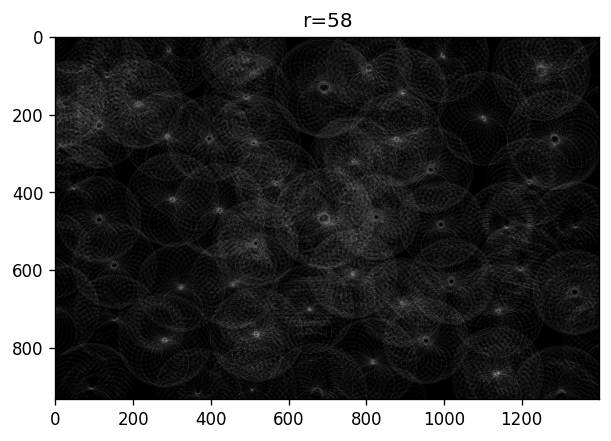

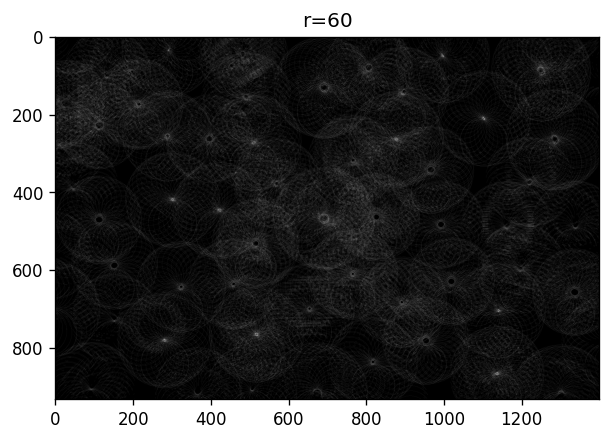

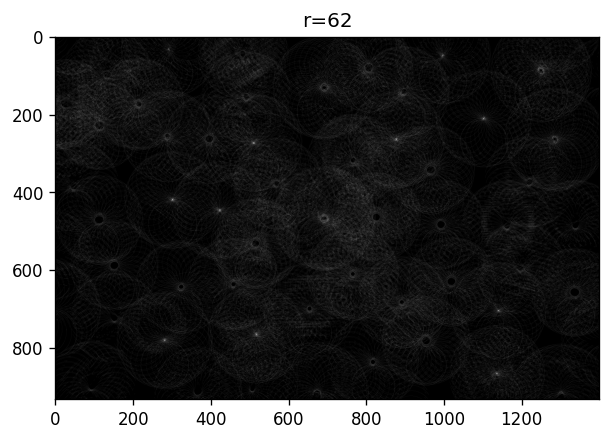

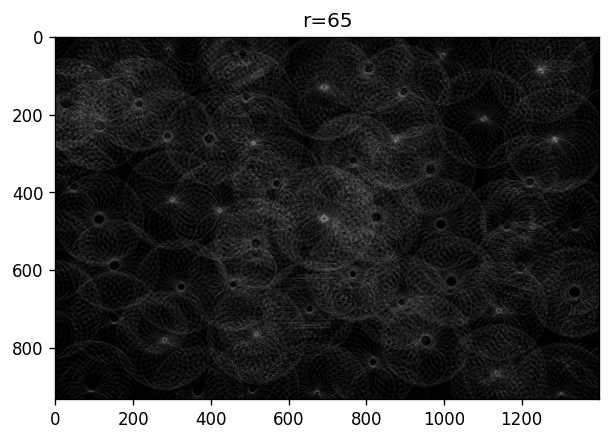

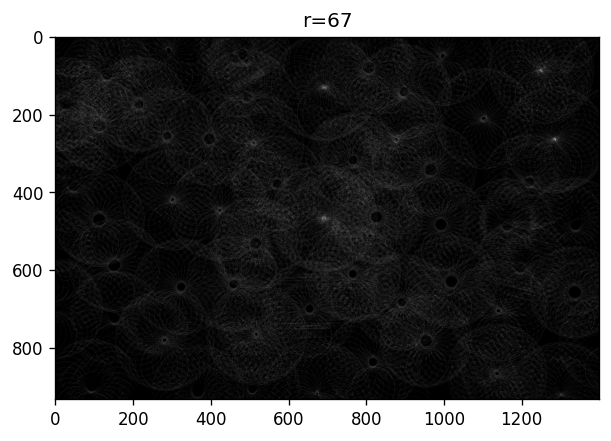

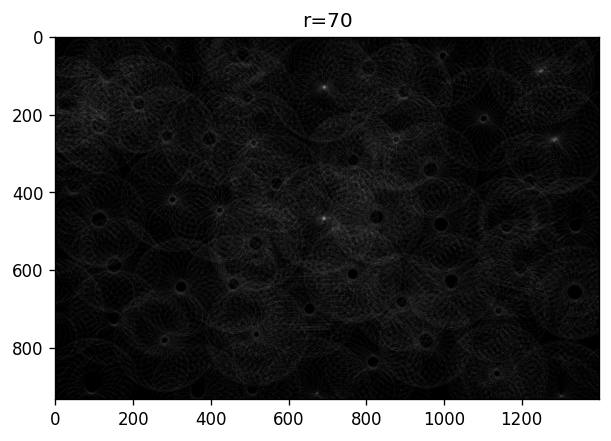

In [48]:
def acc_creater(edge, rad=[50, 55, 60, 65, 70]):
    m, n = edge.shape
    theta = np.linspace(0, 2*np.pi, 30)
    acc = np.zeros((m, n, len(rad)))
    for ind in range(len(rad)):
      r = rad[ind]
      for x in range(m):
          for y in range(n):
              if edge[x,y] == 255:
                  i = r*np.cos(theta) + x
                  j = r*np.sin(theta) + y
                  for k in range(i.size):
                    if i[k] < 0 or i[k] >= m or j[k] < 0 or j[k] >= n:
                      continue
                    acc[int(i[k]), int(j[k]), ind] += 1
    return np.uint8((acc-np.min(acc))/(np.max(acc)-np.min(acc))*255)

rad=[47, 50, 52, 55, 58, 60, 62, 65, 67, 70]
acc = acc_creater(edge, rad=rad)
for i in range(len(rad)):
  show_image(acc[:,:,i], title=f'r={rad[i]}' ,ticks=False)

In [49]:
def filt(img):
    img = img.copy()
    for i in range(10, img.shape[0]-10):
        for j in range(10, img.shape[1]-10):
            one = 0
            if img[i+1,j] == 255:
                one += 1
            if img[i-1,j] == 255:
                one += 1
            if img[i,j+1] == 255:
                one += 1
            if img[i,j-1] == 255:
                one += 1
            if img[i+1,j+1] == 255:
                one += 1
            if img[i+1,j-1] == 255:
                one += 1
            if img[i-1,j+1] == 255:
                one += 1
            if img[i-1,j-1] == 255:
                one += 1
            if one >= 3:
                img[i+1,j] = 0
                img[i-1,j] = 0
                img[i,j+1] = 0
                img[i,j-1] = 0
                img[i+1,j+1] = 0
                img[i+1,j-1] = 0
                img[i-1,j+1] = 0
                img[i-1,j-1] = 0
    return img
def thresh_acc(acc, thresh):
    out = np.zeros(acc.shape)
    for i in range(acc.shape[0]):
        for j in range(acc.shape[1]):
          for k in range(acc.shape[2]):
            if acc[i, j, k] >= thresh:
                out[i, j, k] = 255
    for k in range(acc.shape[2]):
      out[:,:,k] = filt(out[:,:,k])
    return out

acct = thresh_acc(acc, 140)

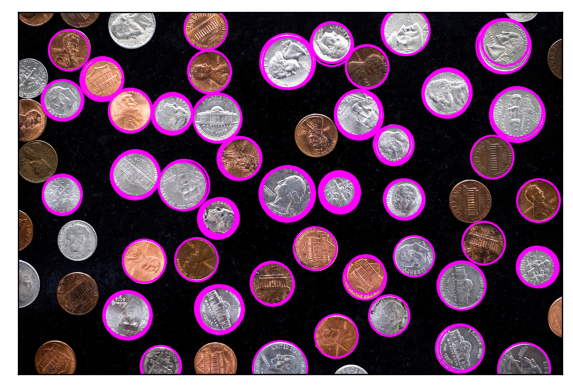

In [50]:
def draw_circles(img, acc, rad):
    img = img.copy()
    for y in range(acc.shape[1]):
      for x in range(acc.shape[0]):
        for z in range(acc.shape[2]):
            if acc[x, y, z] == 255:
                cv2.circle(img, (y, x), rad[z], (255, 0, 255), 3)
    show_image(img, save=True, name='res12-circles.jpg')

draw_circles(img, acct, rad)